# EDA File

### Importing Packages

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
%matplotlib inline

### Loading Data

In [2]:
df = pd.read_csv('./data/train.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [152]:
def data_preprocessing(df):
    df1 = df.copy()
    null_counts = df1.isnull().sum()/len(df1)
    drop_columns = (null_counts[null_counts > 0.8]).index # columns with more than 80% missing values
    df1.drop(drop_columns, axis=1, inplace=True)
    
    #Imputing missing values for LotFrontage
    meadian_lotfrontage = df1.groupby('Neighborhood')['LotFrontage'].median()
    df1.fillna({'LotFrontage': df1['Neighborhood'].map(meadian_lotfrontage)}, inplace=True)
    
    #Imputing missing values for MasVnrType
    df1['MasVnrType'].fillna('None', inplace=True)
    
    #Imputing missing values for MasVnrArea
    df1['MasVnrArea'].fillna(0, inplace=True)
    
    #Imputing missing values for BsmtQual
    df['BsmtQual'].fillna('NA', inplace=True)
    
    #Imputing missing values for BsmtCond
    df['BsmtCond'].fillna('NA', inplace=True)
    
    #Imputing missing values for BsmtExposure
    df['BsmtExposure'].fillna('NA', inplace=True)
    
    #Imputing missing values for BsmtFinType1 & BsmtFinType2
    df['BsmtFinType1'].fillna('NA', inplace=True)
    df['BsmtFinType2'].fillna('NA', inplace=True)
    
    #Imputing missing values for Electrical
    df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
    
    #Imputing missing values for FireplaceQu
    df['FireplaceQu'].fillna('NA', inplace=True)
    
    #Imputing missing values for GarageType, GarageYrBlt, GarageFinish, GarageCond, GarageQual
    df['GarageType'].fillna('NA', inplace=True)
    df['GarageYrBlt'].fillna('NA', inplace=True)
    df['GarageFinish'].fillna('NA', inplace=True)
    df['GarageCond'].fillna('NA', inplace=True)
    df['GarageQual'].fillna('NA', inplace=True)
    
    y_train = np.log1p(df1['SalePrice'])
    
    return df1, y_train

In [113]:
df_train, y_train = data_preprocessing(df)

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_57154/258071014.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['MasVnrType'].fillna('None', inplace=True)
/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_57154/258071014.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [47]:
null_counts = df_train.isnull().sum() / len(df_train)

In [70]:
null_columns = list(null_counts[null_counts > 0].index)

In [76]:
df_train[null_columns].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

### Imputation

#### 1. LotFrontage

<Axes: xlabel='LotFrontage', ylabel='Count'>

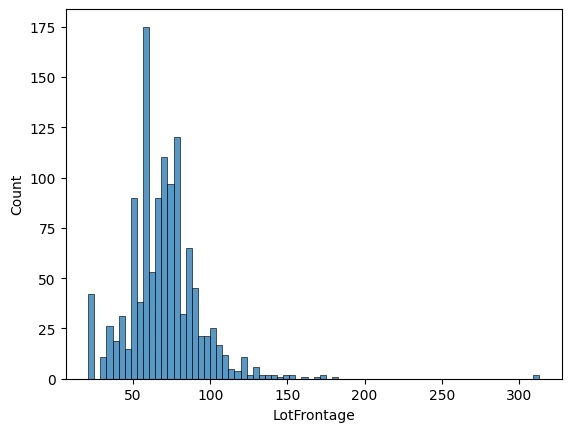

In [77]:
sns.histplot(df['LotFrontage'])

There are three ways to impute this column. Lets see one by one 

1. df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
2. To formally test if Neighborhood significantly affects LotFrontage, perform an ANOVA test

In [87]:
groups = [df[df['Neighborhood'] == nbhd]['LotFrontage'].dropna() for nbhd in df['Neighborhood'].unique()]

In [94]:
# Perform ANOVA
stat, p_value = f_oneway(*groups)
print(f"ANOVA p-value: {p_value}")

if p_value < 0.05:
    print("Neighborhood has a statistically significant effect on LotFrontage.")
else:
    print("No significant effect detected.")

ANOVA p-value: 7.1895881078829375e-53
Neighborhood has a statistically significant effect on LotFrontage.


#### 2. MasVnrType

In [103]:
df['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

MasVnrType: Masonry veneer type

    BrkCmn	Brick Common
    BrkFace	Brick Face
    CBlock	Cinder Block
    None	None
    Stone	Stone

According to data description there can be None value type: So will Impute with that.

#### 3. MasVnrArea

In [110]:
df['MasVnrArea'].isnull().sum()

np.int64(8)

<Axes: xlabel='MasVnrArea', ylabel='Count'>

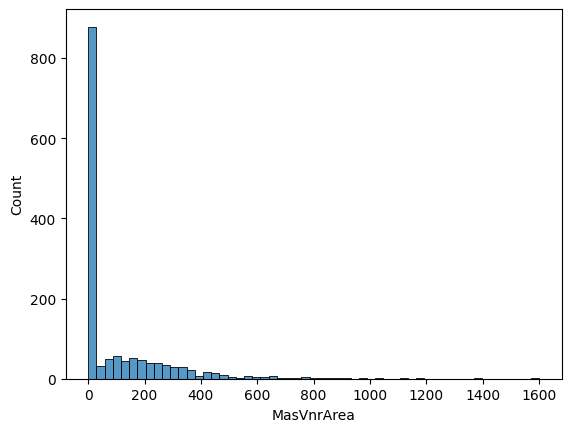

In [108]:
sns.histplot(df['MasVnrArea'])

#### 4. BsmtQual

In [111]:
df['BsmtQual'].value_counts(dropna=False)

BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: count, dtype: int64

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement


Can be imputed with NA - No Basement

#### 5. BsmtCond

In [114]:
df['BsmtCond'].value_counts(dropna=False)

BsmtCond
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: count, dtype: int64

In [116]:
df[df['BsmtCond'].isnull()]['BsmtQual'].value_counts(dropna=False)

BsmtQual
NA    37
Name: count, dtype: int64

Same rows are null, which were imputed 'No Basemest' in previous column. So imputing with 'No Basement'

#### 6. BsmtExposure

In [117]:
df['BsmtExposure'].value_counts(dropna=False)

BsmtExposure
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: count, dtype: int64

In [118]:
df[df['BsmtExposure'].isnull()]['BsmtQual'].value_counts(dropna=False)

BsmtQual
NA    37
Gd     1
Name: count, dtype: int64

Same rows are null, which were imputed 'No Basemest' in previous column. So imputing with 'No Basement'

#### 7. BsmtFinType1 & BsmtFinType2

In [119]:
df['BsmtFinType1'].value_counts(dropna=False)

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: count, dtype: int64

In [120]:
df[df['BsmtFinType1'].isnull()]['BsmtQual'].value_counts(dropna=False)

BsmtQual
NA    37
Name: count, dtype: int64

In [121]:
df[df['BsmtFinType2'].isnull()]['BsmtQual'].value_counts(dropna=False)

BsmtQual
NA    37
Gd     1
Name: count, dtype: int64

Same rows are null, which were imputed 'No Basemest' in previous column. So imputing with 'No Basement'

#### 8. Electrical

In [122]:
df['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

Just 1 missing so imputing with mode value

#### 9. FirePlaceQu

In [123]:
df['FireplaceQu'].value_counts(dropna=False)

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

In [139]:
df[df['FireplaceQu'].isnull()]['Fireplaces'].value_counts(dropna=False)

Fireplaces
0    690
Name: count, dtype: int64

All the fireplacesQu  with NaN values have 0 Fireplaces. So Impute with NA.

#### 10. GarageType, GarageYrBlt, GarageFinish, GarageCond, Garagequal

In [146]:
df['GarageCars'].value_counts(dropna=False) # use GarageCars to impute . which is number of cars that can fit in garage

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

In [147]:
df[df['GarageType'].isnull()]['GarageCars'].value_counts(dropna=False)

GarageCars
0    81
Name: count, dtype: int64

Imputing this with NA, since 0 cars means no garage

In [148]:
df[df['GarageYrBlt'].isnull()]['GarageCars'].value_counts(dropna=False)

GarageCars
0    81
Name: count, dtype: int64

Imputing this with NA, since 0 cars means no garage

In [149]:
df[df['GarageFinish'].isnull()]['GarageCars'].value_counts(dropna=False)

GarageCars
0    81
Name: count, dtype: int64

Imputing this with NA, since 0 cars means no garage

In [150]:
df[df['GarageQual'].isnull()]['GarageCars'].value_counts(dropna=False)

GarageCars
0    81
Name: count, dtype: int64

Imputing this with NA, since 0 cars means no garage

In [151]:
df[df['GarageCond'].isnull()]['GarageCars'].value_counts(dropna=False)

GarageCars
0    81
Name: count, dtype: int64

Imputing this with NA, since 0 cars means no garage